In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
from collections import Counter
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
## Reading in the data
ks = pd.read_csv("~/Desktop/dataforgood/data/ks-projects-201801.csv")
ks.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [3]:
## Exploring the data
ks.describe()

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


In [4]:
## Looking at all the different countries in the data
ks.country.unique()

array(['GB', 'US', 'CA', 'AU', 'NO', 'IT', 'DE', 'IE', 'MX', 'ES', 'N,0"',
       'SE', 'FR', 'NL', 'NZ', 'CH', 'AT', 'DK', 'BE', 'HK', 'LU', 'SG',
       'JP'], dtype=object)

In [5]:
## Total number of kickstarters per country 
ks.country.value_counts()

US      292627
GB       33672
CA       14756
AU        7839
DE        4171
N,0"      3797
FR        2939
IT        2878
NL        2868
ES        2276
SE        1757
MX        1752
NZ        1447
DK        1113
IE         811
CH         761
NO         708
HK         618
BE         617
AT         597
SG         555
LU          62
JP          40
Name: country, dtype: int64

In [6]:
## Replace NA’s in country with None
replace = ks[~ks.country.str.contains('^[A-Z]{2}$', case=False)].country.unique().tolist()
ks.loc[:,'country'] = ks.country.replace(to_replace=replace, value='None')

## Which regions have the best success with kickstarters?
##### i.e. total number of successes in country / total number of projects in country

In [7]:
## Total number of kickstarters within each state per country
## Note: just because they started doesn't mean they were successful
states_of_countries = pd.DataFrame(ks.groupby(["country","state"]).state.count())
states_of_countries.unstack()

state                                                 
state   canceled    failed    live successful suspended undefined
country                                                          
AT          91.0     378.0    15.0      107.0       6.0       NaN
AU        1065.0    4606.0    70.0     2010.0      88.0       NaN
BE          74.0     371.0    12.0      152.0       8.0       NaN
CA        2138.0    8236.0   132.0     4134.0     116.0       NaN
CH          84.0     465.0    14.0      187.0      11.0       NaN
DE         621.0    2499.0    75.0      937.0      39.0       NaN
DK         157.0     566.0    16.0      360.0      14.0       NaN
ES         331.0    1381.0    52.0      492.0      20.0       NaN
FR         353.0    1612.0    52.0      908.0      14.0       NaN
GB        3761.0   17387.0   279.0    12067.0     178.0       NaN
HK          87.0     261.0    35.0      216.0      19.0       NaN
IE         110.0     476.0    11.0      207.0       7.0       NaN
IT         406.0    1930.0    76.0      439.0      27.0       NaN
JP           8.0      16.0     9.0        7.0       NaN       NaN
LU           4.0      38.0     1.0       19.0       NaN       NaN
MX         221.0    1015.0   107.0      396.0      13.0       NaN
NL         396.0    1794.0    35.0      617.0      26.0       NaN
NO         112.0     420.0     8.0      162.0       6.0       NaN
NZ         151.0     826.0    11.0      448.0      11.0       NaN
None        22.0     105.0     1.0      105.0       2.0    3562.0
SE         209.0    1000.0    20.0      509.0      19.0       NaN
SG          67.0     276.0    28.0      178.0       6.0       NaN
US       28311.0  152061.0  1740.0   109299.0    1216.0       NaN

In [8]:
## Total number of kickstarters per country 
total_states_per_country = states_of_countries.groupby(["country"]).state.sum()
total_states_per_country

country
AT         597
AU        7839
BE         617
CA       14756
CH         761
DE        4171
DK        1113
ES        2276
FR        2939
GB       33672
HK         618
IE         811
IT        2878
JP          40
LU          62
MX        1752
NL        2868
NO         708
NZ        1447
None      3797
SE        1757
SG         555
US      292627
Name: state, dtype: int64

In [9]:
## Percentages of successful kickstaters by country
rate_eachstate_country = pd.DataFrame(states_of_countries.state / total_states_per_country)
rate_eachstate_country = rate_eachstate_country.unstack()
rate_eachstate_country.state.successful

country
AT      0.179229
AU      0.256410
BE      0.246353
CA      0.280157
CH      0.245729
DE      0.224646
DK      0.323450
ES      0.216169
FR      0.308949
GB      0.358369
HK      0.349515
IE      0.255240
IT      0.152536
JP      0.175000
LU      0.306452
MX      0.226027
NL      0.215132
NO      0.228814
NZ      0.309606
None    0.027653
SE      0.289698
SG      0.320721
US      0.373510
Name: successful, dtype: float64

In [10]:
## Percentages of successful kickstaters by country from greatest to least
rate_eachstate_country.state.successful.sort_values(ascending=False)

country
US      0.373510
GB      0.358369
HK      0.349515
DK      0.323450
SG      0.320721
NZ      0.309606
FR      0.308949
LU      0.306452
SE      0.289698
CA      0.280157
AU      0.256410
IE      0.255240
BE      0.246353
CH      0.245729
NO      0.228814
MX      0.226027
DE      0.224646
ES      0.216169
NL      0.215132
AT      0.179229
JP      0.175000
IT      0.152536
None    0.027653
Name: successful, dtype: float64

We find that the US has the best success with Kickstarter with about 37% campaigns succeeding.
Closely following is the United Kingdom with 35.8% and Hong Kong with 34.95%.

## Mean Pledge Amount per Country
##### use usd_pledged_real

In [11]:
## Looking at the average pledge for a kickstarter by country greatest to least 
ks.groupby(["country"]).usd_pledged_real.mean().sort_values(ascending=False)

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
None     2949.850598
JP       2897.210250
MX       1387.002568
Name: usd_pledged_real, dtype: float64

Interestingly, Switzerland (CH) has the highest average real pledge amount.
Mexico has the lowest average real pledge amount.

## Correlation between goal and success/failure
##### use usd_goal_real

In [12]:
## Average goal for kickstarter within each state per country 
ks.groupby(['country','state']).usd_goal_real.median().unstack()

state,canceled,failed,live,successful,suspended,undefined
country,,,,,,
AT,17505.660,11735.420,7524.910,7887.590,24644.240,NaN
AU,10411.010,7443.250,3936.390,3454.630,3877.225,NaN
BE,11353.470,8708.810,5443.240,3531.270,2260.200,NaN
CA,8927.770,7382.375,6550.045,3488.255,6112.705,NaN
CH,25804.815,16400.540,19473.745,10248.630,10327.590,NaN
DE,16726.510,11005.940,12136.950,5175.240,11360.020,NaN
DK,7306.630,7266.885,4073.520,2835.905,1175.810,NaN
ES,11403.030,8907.790,6068.480,3943.810,2239.085,NaN
FR,12045.000,11013.940,10923.260,5838.050,9700.605,NaN


In [13]:
## Average goal for a kickstarter by country
country_goal_means = ks.groupby(['country']).usd_goal_real.median().sort_values(ascending=False)
country_goal_means

country
CH      15367.440
AT      11280.950
IT      11131.520
DE      10606.030
LU      10410.905
FR       9521.680
NL       9325.560
HK       9015.395
JP       8823.790
BE       7411.970
ES       7025.715
IE       6721.180
AU       6279.300
SE       5916.320
SG       5898.400
NO       5868.335
CA       5761.375
NZ       5262.760
US       5250.000
DK       5032.880
GB       4745.860
None     3583.050
MX       2988.835
Name: usd_goal_real, dtype: float64

In [14]:
## Creating labels needed for future plot
country_labels = [co for co in country_goal_means.index]
country_labels

['CH',
 'AT',
 'IT',
 'DE',
 'LU',
 'FR',
 'NL',
 'HK',
 'JP',
 'BE',
 'ES',
 'IE',
 'AU',
 'SE',
 'SG',
 'NO',
 'CA',
 'NZ',
 'US',
 'DK',
 'GB',
 'None',
 'MX']

In [15]:
## Creating labels needed for future plot
[x for x in enumerate(country_labels)]

[(0, 'CH'),
 (1, 'AT'),
 (2, 'IT'),
 (3, 'DE'),
 (4, 'LU'),
 (5, 'FR'),
 (6, 'NL'),
 (7, 'HK'),
 (8, 'JP'),
 (9, 'BE'),
 (10, 'ES'),
 (11, 'IE'),
 (12, 'AU'),
 (13, 'SE'),
 (14, 'SG'),
 (15, 'NO'),
 (16, 'CA'),
 (17, 'NZ'),
 (18, 'US'),
 (19, 'DK'),
 (20, 'GB'),
 (21, 'None'),
 (22, 'MX')]

In [16]:
labels = ['{}'.format(co) for co in country_labels]

In [17]:
## Percentages of successful kickstaters by country 
rate_success_by_country = rate_eachstate_country.state.successful
rate_success_by_country.index = country_labels
rate_success_by_country = rate_eachstate_country.state.successful.reindex(country_labels)
rate_success_by_country

country
CH      0.245729
AT      0.179229
IT      0.152536
DE      0.224646
LU      0.306452
FR      0.308949
NL      0.215132
HK      0.349515
JP      0.175000
BE      0.246353
ES      0.216169
IE      0.255240
AU      0.256410
SE      0.289698
SG      0.320721
NO      0.228814
CA      0.280157
NZ      0.309606
US      0.373510
DK      0.323450
GB      0.358369
None    0.027653
MX      0.226027
Name: successful, dtype: float64

In [18]:
## Checking the correlation between goal and rate of successful kickstarters by country
np.corrcoef(country_goal_means,rate_success_by_country)

array([[ 1.        , -0.11246297],
       [-0.11246297,  1.        ]])

Technically, there is a slight negative correaltion between a country's goal amount and its success rate. As its goal amount increases, its success rate drops

In [19]:
## Percentages of failed kickstaters by country 
rate_failed_by_country = rate_eachstate_country.state.failed
rate_failed_by_country.index = country_labels
rate_failed_by_country = rate_eachstate_country.state.failed.reindex(country_labels)
rate_failed_by_country

country
CH      0.611038
AT      0.633166
IT      0.670605
DE      0.599137
LU      0.612903
FR      0.548486
NL      0.625523
HK      0.422330
JP      0.400000
BE      0.601297
ES      0.606766
IE      0.586930
AU      0.587575
SE      0.569152
SG      0.497297
NO      0.593220
CA      0.558146
NZ      0.570836
US      0.519641
DK      0.508535
GB      0.516364
None    0.027653
MX      0.579338
Name: failed, dtype: float64

In [20]:
## Checking the correlation between goal and rate of failed kickstarters by country
np.corrcoef(country_goal_means,rate_failed_by_country)

array([[1.        , 0.39561629],
       [0.39561629, 1.        ]])

Interestly, there is a positive correaltion between a country's goal amount and its failure rate. As its goal amount increases, its failure rate increases.

We will look into these correlations further with scatter plots:

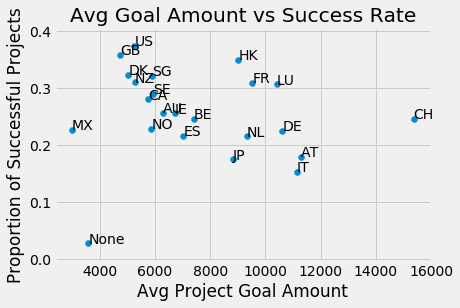

In [21]:
## Scatter plot for correlation between goal and rate of successful kickstarters by country
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()

ax.scatter(country_goal_means,rate_success_by_country)
plt.xlabel('Avg Project Goal Amount')
plt.ylabel('Proportion of Successful Projects')
plt.title('Avg Goal Amount vs Success Rate')
for i,co in enumerate(country_labels):
    ax.annotate(co, (country_goal_means[i], rate_success_by_country[i]))

There is no relationship between the goal amount of a country's projects and the overall sucess rate for a country's projects. Switzlerland's average goal amount is an outlier; it's projects have a notebly high average goal amount, however Switzerland does not have a particularly high success rate nor does it have a particularly low success rate. 


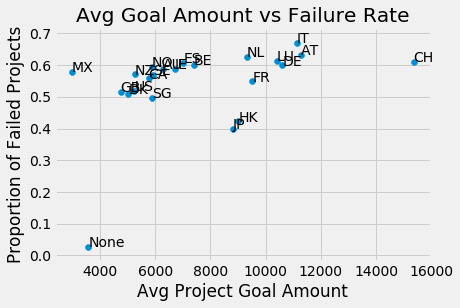

In [22]:
## Scatter plot for correlation between goal and rate of failed kickstarters by country
plt.style.use('fivethirtyeight')
fig,ax = plt.subplots()

ax.scatter(country_goal_means,rate_failed_by_country)
plt.xlabel('Avg Project Goal Amount')
plt.ylabel('Proportion of Failed Projects')
plt.title('Avg Goal Amount vs Failure Rate')
for i,co in enumerate(country_labels):
    ax.annotate(co, (country_goal_means[i], rate_failed_by_country[i]))

There seems to be a relationship between the goal amount projected by country and the overall rate of failure for that country. As the average goal amount increases, there rate for failure increases. This suggests that higher and ambitious goal amounts set by kickstarters in a country can be on a path of failure.

## Currency vs. region
##### use usd_pledged_real, usd_goal_real VALUES

In [23]:
## Total pledged amount and Total goal amount per country
ks.groupby(["country"])["usd_pledged_real", "usd_goal_real"].sum()

,usd_pledged_real,usd_goal_real
country,,
AT,9.665789e+06,2.665748e+07
AU,4.673713e+07,4.555105e+08
BE,4.181558e+06,2.302780e+07
CA,9.179336e+07,6.552910e+08
CH,1.305512e+07,2.064454e+08
DE,3.977627e+07,3.136943e+08
DK,7.583262e+06,3.960204e+07
ES,1.294765e+07,1.196695e+08
FR,3.435751e+07,2.381982e+08


In [24]:
## Average pledged amount and Average goal amount per country
ks.groupby(["country"])["usd_goal_real","usd_pledged_real"].median()

,usd_goal_real,usd_pledged_real
country,,
AT,11280.950,228.240
AU,6279.300,221.730
BE,7411.970,226.430
CA,5761.375,302.820
CH,15367.440,371.870
DE,10606.030,286.410
DK,5032.880,372.510
ES,7025.715,157.305
FR,9521.680,540.860


In [25]:
## Average pledged amount by country greatest to least
ks.groupby(["country"])["usd_pledged_real"].median().sort_values(ascending=False)

country
HK      2312.120
SG       843.630
JP       748.570
US       725.000
LU       670.765
None     616.000
FR       540.860
GB       506.195
DK       372.510
CH       371.870
NZ       360.960
SE       326.160
CA       302.820
DE       286.410
AT       228.240
BE       226.430
AU       221.730
IE       217.900
NL       165.510
ES       157.305
IT       112.115
NO       109.045
MX        84.650
Name: usd_pledged_real, dtype: float64

In [26]:
## Average goal amount by country greatest to least
ks.groupby(["country"])["usd_goal_real"].median().sort_values(ascending=False)

country
CH      15367.440
AT      11280.950
IT      11131.520
DE      10606.030
LU      10410.905
FR       9521.680
NL       9325.560
HK       9015.395
JP       8823.790
BE       7411.970
ES       7025.715
IE       6721.180
AU       6279.300
SE       5916.320
SG       5898.400
NO       5868.335
CA       5761.375
NZ       5262.760
US       5250.000
DK       5032.880
GB       4745.860
None     3583.050
MX       2988.835
Name: usd_goal_real, dtype: float64

In [27]:
## Total pledge amount by country
total_country_pledged = ks.groupby(["country"])["usd_pledged_real"].sum()

## Average pledge amount for kickstarter per country
rate_pledge_country = total_country_pledged / total_states_per_country
rate_pledge_country.sort_values(ascending=False)

# Example: 
# Average pledge amount in US for a kickstarter is $9,670.19
# Average pledge amount in MX for a kickstarter is $1,387.00

country
CH      17155.217096
HK      16228.940032
AT      16190.600603
FR      11690.203409
SG      10536.136523
NL      10197.038870
US       9670.193050
DE       9536.387924
SE       7635.630569
LU       7559.284839
GB       7026.233822
DK       6813.352713
BE       6777.240827
CA       6220.748131
AU       5962.128806
IT       5693.546668
ES       5688.775738
NZ       5405.330124
IE       5163.085709
NO       3769.410565
None     2949.850598
JP       2897.210250
MX       1387.002568
dtype: float64

In [28]:
## Total goal amount by country
total_country_goal = ks.groupby(["country"])["usd_goal_real"].sum()

## Average goal amount of kickstarter per country
rate_pledge_country = total_country_goal / total_states_per_country
rate_pledge_country.sort_values(ascending=False)

# Example: 
# Average pledge amount in US for a kickstarter is $44,034.96
# Average pledge amount in MX for a kickstarter is $14,869.93

country
CH      271281.726675
NL      109507.028026
FR       81047.372872
IT       78807.782960
DE       75208.408327
NO       67440.295353
AU       58108.238300
ES       52578.874587
IE       47405.978150
AT       44652.387655
CA       44408.442966
US       44034.969705
GB       42774.124388
SE       40994.175157
BE       37322.199433
DK       35581.350836
LU       33783.152097
NZ       25572.492958
HK       23865.608835
JP       16596.918250
SG       15474.692721
MX       14869.932825
None      5097.306455
dtype: float64